In [1]:
import requests
import csv
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
def scrap(anime):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    url = requests.get("https://listfist.com/list-of-{}-arcs".format(anime.replace(' ','-')),headers=headers)
    soup = BeautifulSoup(url.content,'html.parser')
    arc_names = soup.findAll('td',class_="col-2 even")
    arc_total_episodes = soup.findAll('td',class_="col-8 even")
    
    rows = zip([i.text for i in arc_names],[j.text for j in arc_total_episodes])
    with open("{}_analysis.csv".format(anime), "wt+", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Arc names","Total Episodes"])
        for row in rows:
            writer.writerow(row)
        
    file.close()

In [3]:
def name():
    bigthree = ['one piece','naruto','bleach']
    while True:
        your_choice = input("Which anime from Big three you want to analysis:").lower()
        if your_choice not in bigthree:
            print('Only enter from these 3: {}'.format(' '.join(bigthree)))
            continue
        else:
            bigthree_analyis = scrap(your_choice)
            break
            
    return your_choice

In [4]:
anime_name = name()
anaylsis_data = "{}_analysis.csv".format(anime_name.replace(" ","_"))

Which anime from Big three you want to analysis:one piece


In [5]:
dataset = pd.read_csv(anaylsis_data)
df = pd.DataFrame(dataset)

In [6]:
df.head(10)

,Arc names,Total Episodes
0,Romance Dawn Arc,3
1,Orange Town Arc,5
2,Syrup Village Arc,10
3,Baratie Arc,12
4,Arlong Park Arc,15
5,Buggy Side Story Arc,2
6,Loguetown Arc,6
7,Warship Island Arc,8
8,Reverse Mountain Arc,2
9,Whiskey Peak Arc,4


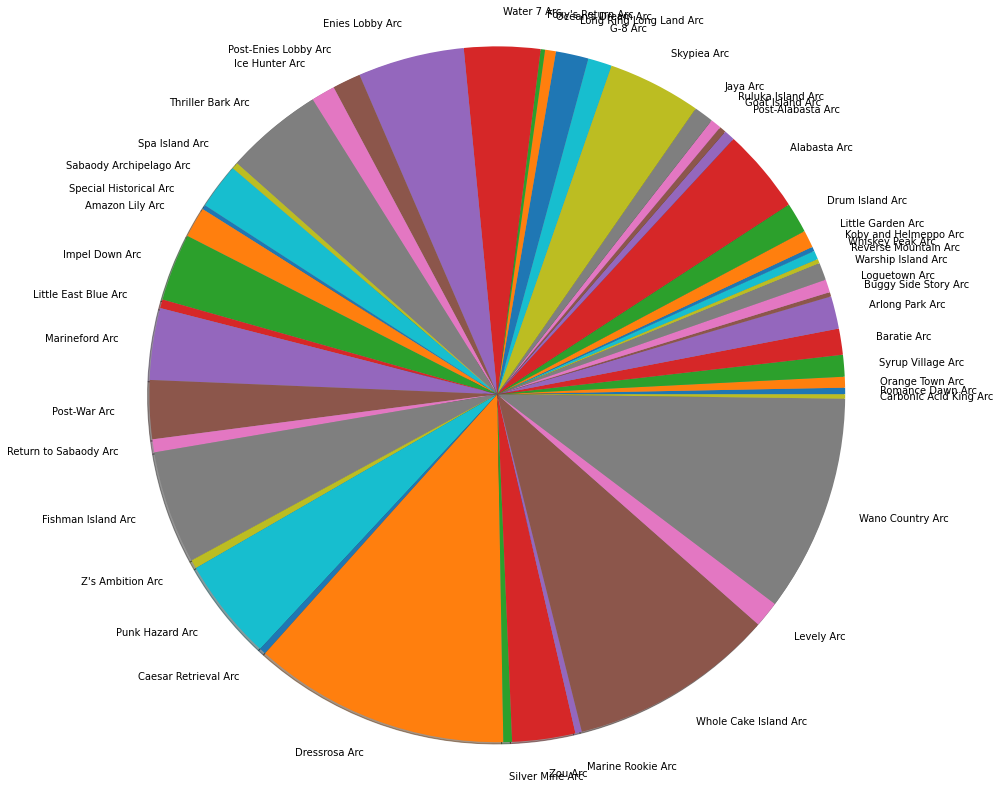

In [11]:
episode = dataset.iloc[:,-1].values
arc = dataset.iloc[:,0].values

plt.pie(episode, labels = arc,shadow = True,radius=4)
plt.show() 

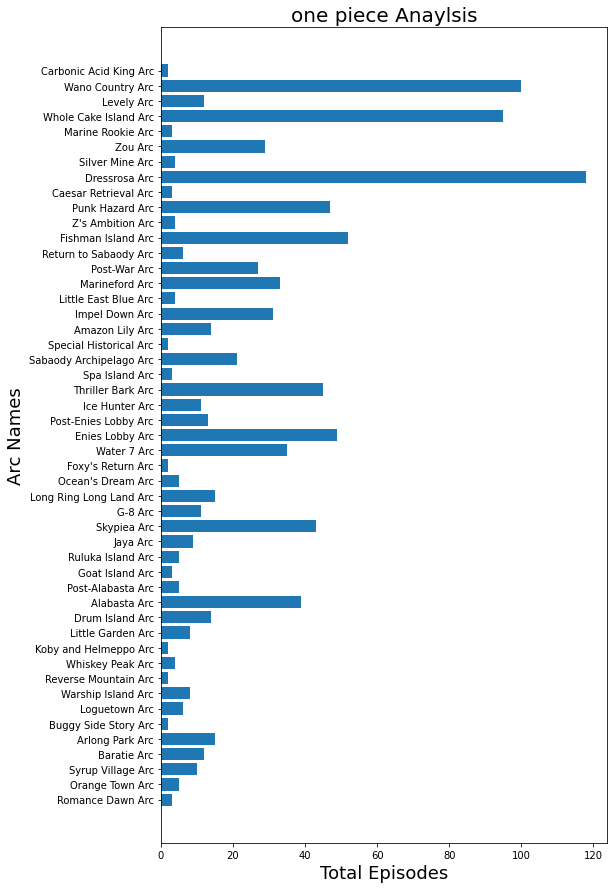

In [15]:
plt.figure(figsize=(8,15))
plt.barh(arc,episode)
plt.xlabel("Total Episodes",fontsize=18)
plt.ylabel("Arc Names",fontsize=18)
plt.title("{} Anaylsis".format(anime_name),fontsize=20)
plt.show()